# Project \#2 - 🎹 Query a Digital Music Store Database

## Introduction

In this project, I am required to produce a series of questions that can be answered through SQL queries. The data comes from the sample Chinook database. These questions, and the resulting answers, will help guide the marketing team to a stronger understanding of their digital media, customers, employees and invoice information.

## Task

- Generate 4 unique SQL queries to answer questions previously asked about the database
- Create a presentation from the queries including a brief explanation of the insights

## Entity Relationship Diagram

Included below is the ERD of the Chinook database.

---
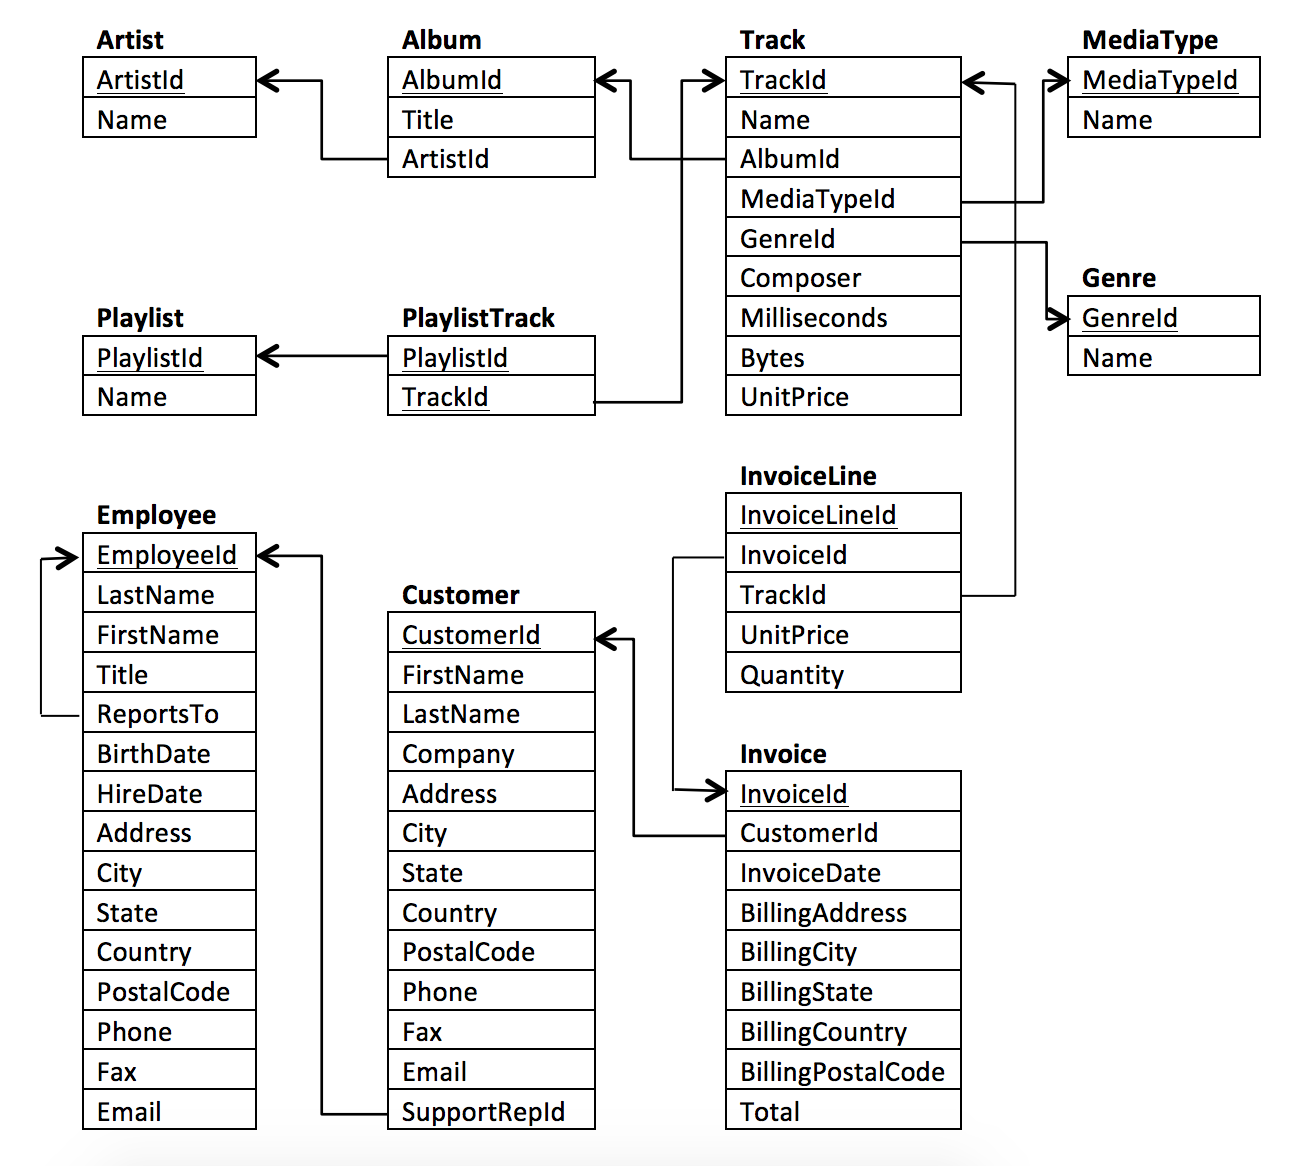



---

In [1]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

---
### Question \#1

#### Which genre has the highest total sales among audio files?

I would like to begin by looking at the musical genres that have the highest total sales in the database. However before we can begin, we first need to determine if there are any other types of media, such as photos and video files, and filter those out of our query. 

When looking at the provided ERD, there is a table called _MediaType_ that will contain all the different types of media files within the store database. Let's run a quick query to see.

```sql
SELECT *
    FROM mediatype
```

| mediatypeid | name |
| :--- | :--- |
| 1 | MPEG audio file |
| 2 | Protected AAC audio file |
| 3 | Protected MPEG-4 video file |
| 4 | Purchased AAC audio file |
| 5 | AAC audio file |

From the table, we can see that there is one type of media file that isn't an audio file, id\#3 Protected MPEG-4 video. We will make sure to omit these files when determining the genre with the highest total sales.

Next, we need to make sure to use the _InvoiceLine_ table instead of the _Invoice_ table for our sales figures, since the _Invoice_ table only contains the total amount a customer has paid in a transaction and doesn't display the individual song sales containing the song genre in the invoice. In order to correctly calculate the highest sales genre, we will **multiply** the UnitPrice and Quantity columns from the _InvoiceLine_ table and **SUM( )** the values, finally grouping by genre. I have limited the query to the 10 highest-selling genres. Here is the query and its results:

```sql
SELECT g.name as genre_type, SUM(invln.UnitPrice*invln.Quantity) as total_amt_sold
	FROM invoice AS inv
	JOIN invoiceline AS invln
	ON inv.invoiceid = invln.invoiceid
	JOIN track AS t
	ON t.trackid = invln.trackid
	JOIN genre AS g
	ON g.genreid = t.genreid
	JOIN mediatype AS m
	ON m.mediatypeid = t.mediatypeid
	WHERE m.MediaTypeId != 3
	GROUP BY 1
	ORDER BY 2 DESC
	LIMIT 10;
```

| genre_type | total_amt_sold |
| :--- | :--- |
|Rock | 826.65 |
Latin | 382.14 |
Metal | 261.36 |
Alternative & Punk | 241.56 |
Jazz | 79.20 |
Blues | 60.39 |
Classical | 40.59 |
R&B/Soul |40.59 |
Reggae |29.70 |
Pop | 27.72 |

The query was exported to .csv and loaded into Excel in order to build the presentation slide. Each of the visualizations are accompanied by short explanations of the query results.

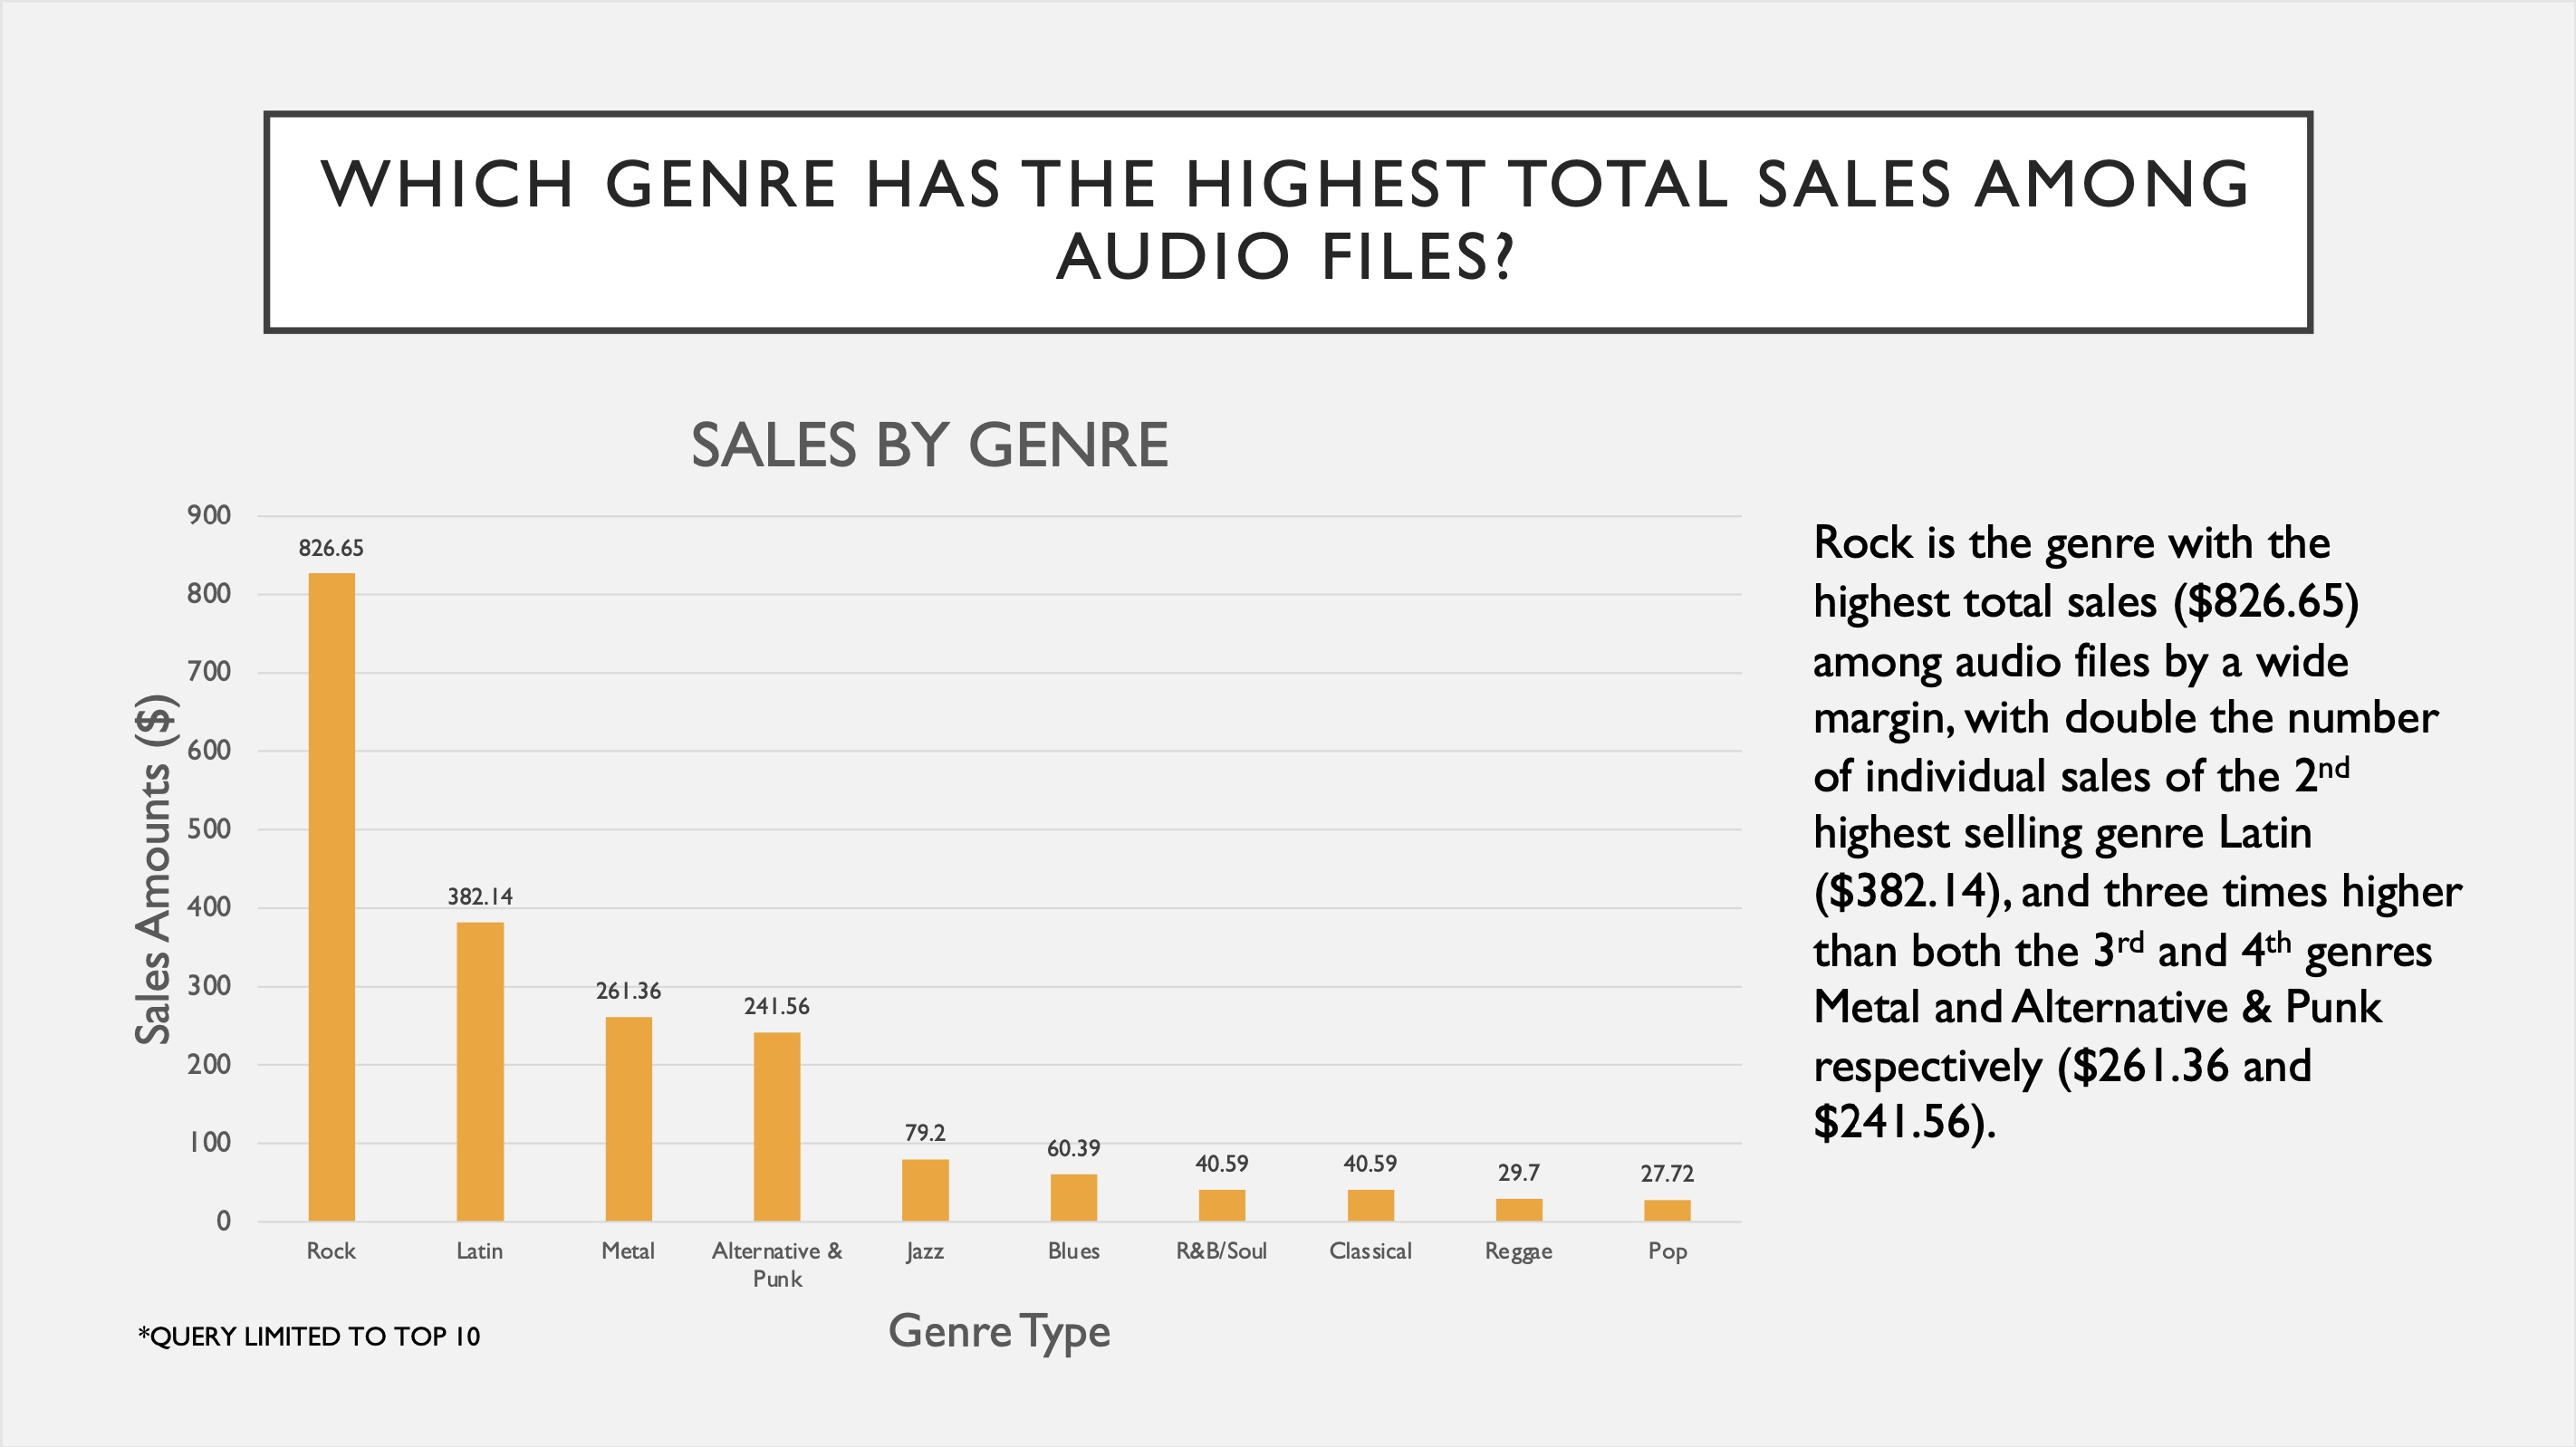

---
### Question \#2

#### Which artists have the highest number of individual sales within the Rock genre?

After determining that the Rock genre makes up the highest total sales in dollars by a wide margin, I want to delve deeper into this genre. Are sales evenly distributed throughout the genre? Or are certain artists more popular than others? Being that it is a digital music store, we can safely assume that almost all song purchases will be purchased once by the user and then downloaded onto the user's device. Therefore, identifying the number of individual song sales/downloads will provide the most logical solution to determine the most popular artists.

Our query will join many of same tables as the previous query, but will also require us to join the _Artist_ table through the _Album_ table to find the individual artist sales within the genre. The **COUNT( )** function will then return us the number of rows or individual song sales for each artist. The query is below:

```sql
SELECT a.name as artist, COUNT(*) as song_purchases
	FROM invoice AS inv
	JOIN invoiceline AS invln
	ON inv.invoiceid = invln.invoiceid
	JOIN track AS t
	ON t.trackid = invln.trackid
	JOIN genre AS g
	ON g.genreid = t.genreid
	JOIN album AS alb
	ON alb.albumid = t.albumid
	JOIN artist AS a
	ON a.artistid = alb.artistid
	WHERE g.name = 'Rock'
	GROUP BY 1
	ORDER BY 2 DESC
	LIMIT 10;
```

| artist | song_purchases |
| :--- | :--- |
| U2 |	91 |
| Led Zeppelin | 87 |
| Iron Maiden |	54 |
| Deep Purple |	44 |
| Creedence Clearwater Revival | 37 |
| Queen | 37 |
| Kiss | 31 |
| Van Halen | 29 |
| Guns N' Roses | 26 |
| Pearl Jam | 26 |

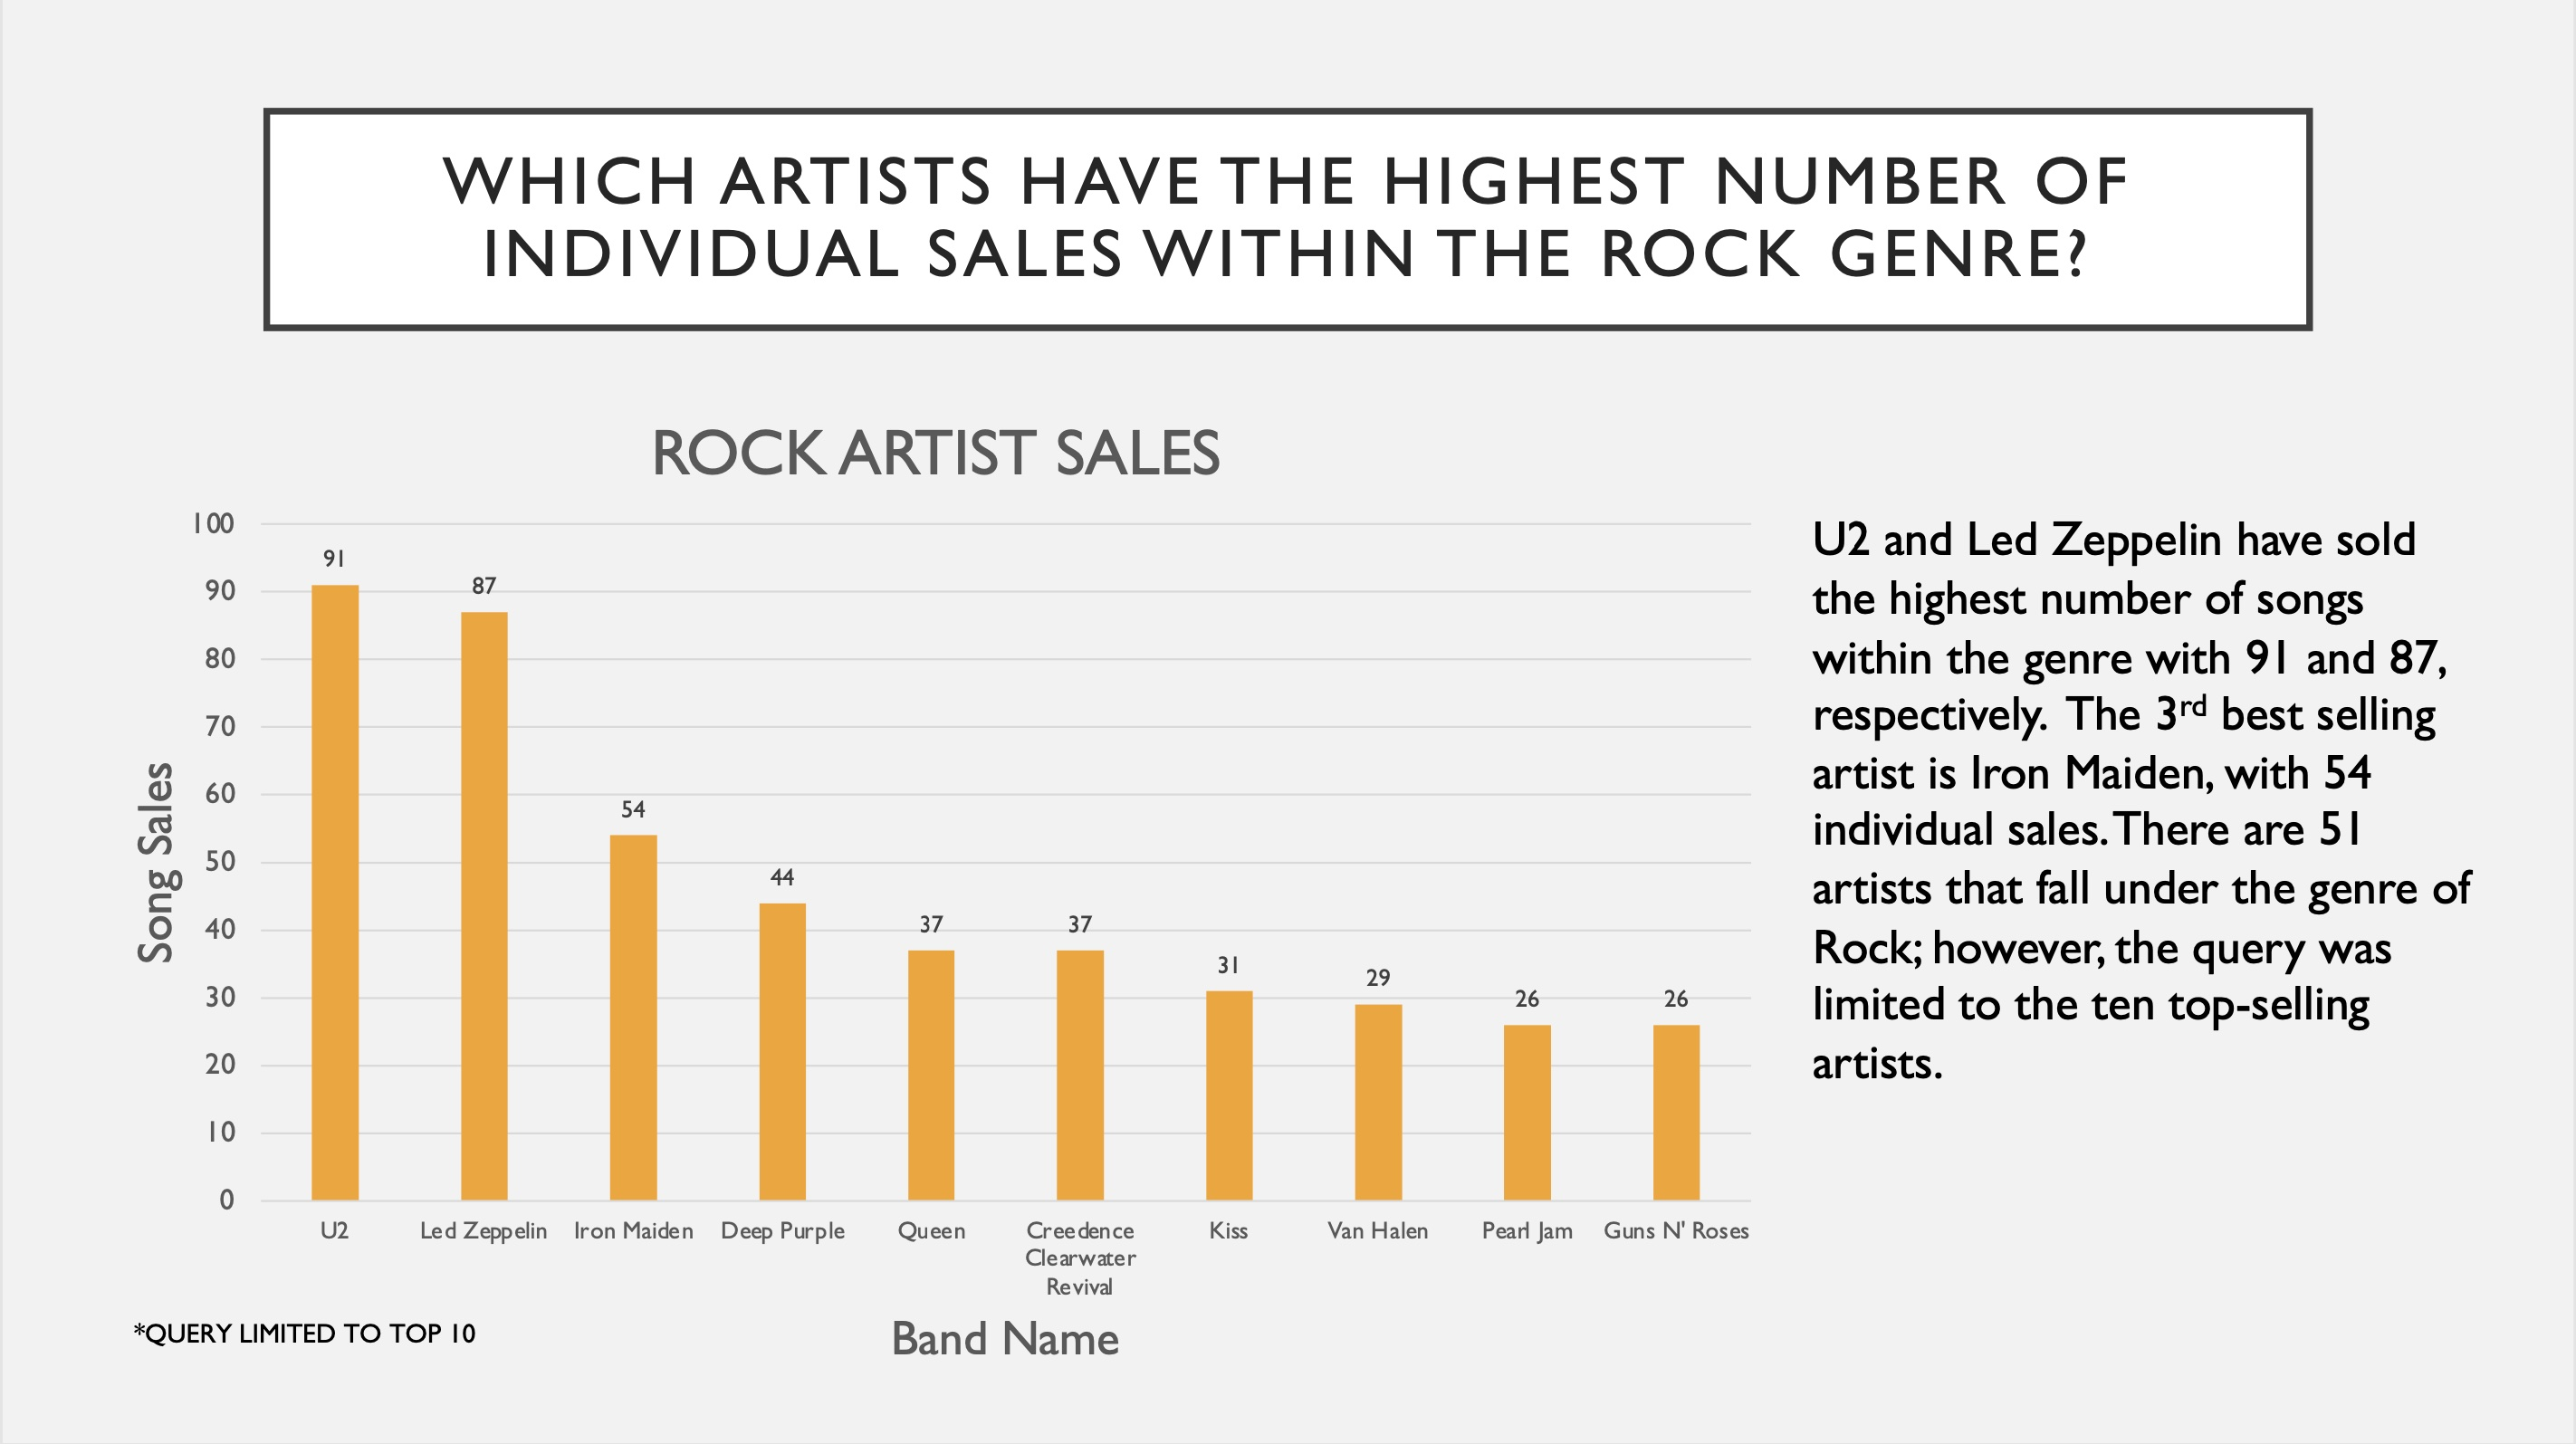

---
### Question \#3

#### Are U2 and Led Zeppelin songs among the top 10 highest selling in the Rock genre?

Among the 51 artists within the Rock genre, the artists U2 and Led Zeppelin have had the highest number of individual songs sales by a wide margin. Do these two artists have a few extremely popular songs with high individual purchases/downloads? Or do they have a wider catalogue of semi-popular songs compared to other artists? 

Let's write a query to explore the highest selling songs in the Rock genre.

```sql
SELECT t.name as song_name, a.name as artist_name, COUNT(t.trackid) as num_of_sales
	FROM invoice AS inv
	JOIN invoiceline AS invln
	ON inv.invoiceid = invln.invoiceid
	JOIN track AS t
	ON t.trackid = invln.trackid
	JOIN genre AS g
	ON g.genreid = t.genreid
	JOIN album AS alb
	ON alb.albumid = t.albumid
	JOIN artist AS a
	ON a.artistid = alb.artistid
	WHERE g.name = 'Rock'
	GROUP BY 1, 2
	ORDER BY 3 DESC
```

| song_name | artist_name | num_of_sales |
| :--- | :--- | :--- |
| Sure Know Something |	Kiss | 4 |
| Eurption | Van Halen | 4 |
| Hallowed Be Thy Name | Iron Maiden | 3 |
| The Number Of The Beast | Iron Maiden | 3 |
| Dazed and Confused | Led Zeppelin | 3 |
| Stairway To Heaven | Led Zeppelin | 3 |
| Plaster Caster | Kiss | 3 |
| Sweetest Thing | U2 | 3 |
| The Trooper | Iron Maiden | 2 |
| Piece of Pie | Stone Temple Pilots | 2 |

However, I would like to concatenate the song name and artist for the purpose of my presentation. Normally the SQL standard is to use the **CONCAT( )** function, but SQLite doesn't support this. Instead, SQLite uses the concatenate operator **| |** to join two strings.

Let's take our last query and create a subquery by nesting it within our **FROM** clause, with the concatenation occuring from the **SELECT** clause:

```sql
SELECT song_name|| ' ' || 'by' || ' ' ||artist_name as song_artist, num_of_sales
    FROM (
        SELECT t.name as song_name, a.name as artist_name, COUNT(t.trackid) as num_of_sales
            FROM invoice AS inv
            JOIN invoiceline AS invln
            ON inv.invoiceid = invln.invoiceid
            JOIN track AS t
            ON t.trackid = invln.trackid
            JOIN genre AS g
            ON g.genreid = t.genreid
            JOIN album AS alb
            ON alb.albumid = t.albumid
            JOIN artist AS a
            ON a.artistid = alb.artistid
            WHERE g.name = 'Rock'
            GROUP BY 1, 2
            ORDER BY 3 DESC
        ) AS tb1
    LIMIT 10;
```

Here is the resulting presentation slide for our 3rd question. U2 and Led Zeppelin do have songs among the highest-selling in the genre, but neither have any one particular song that has sold several times more than the others by a large margin.

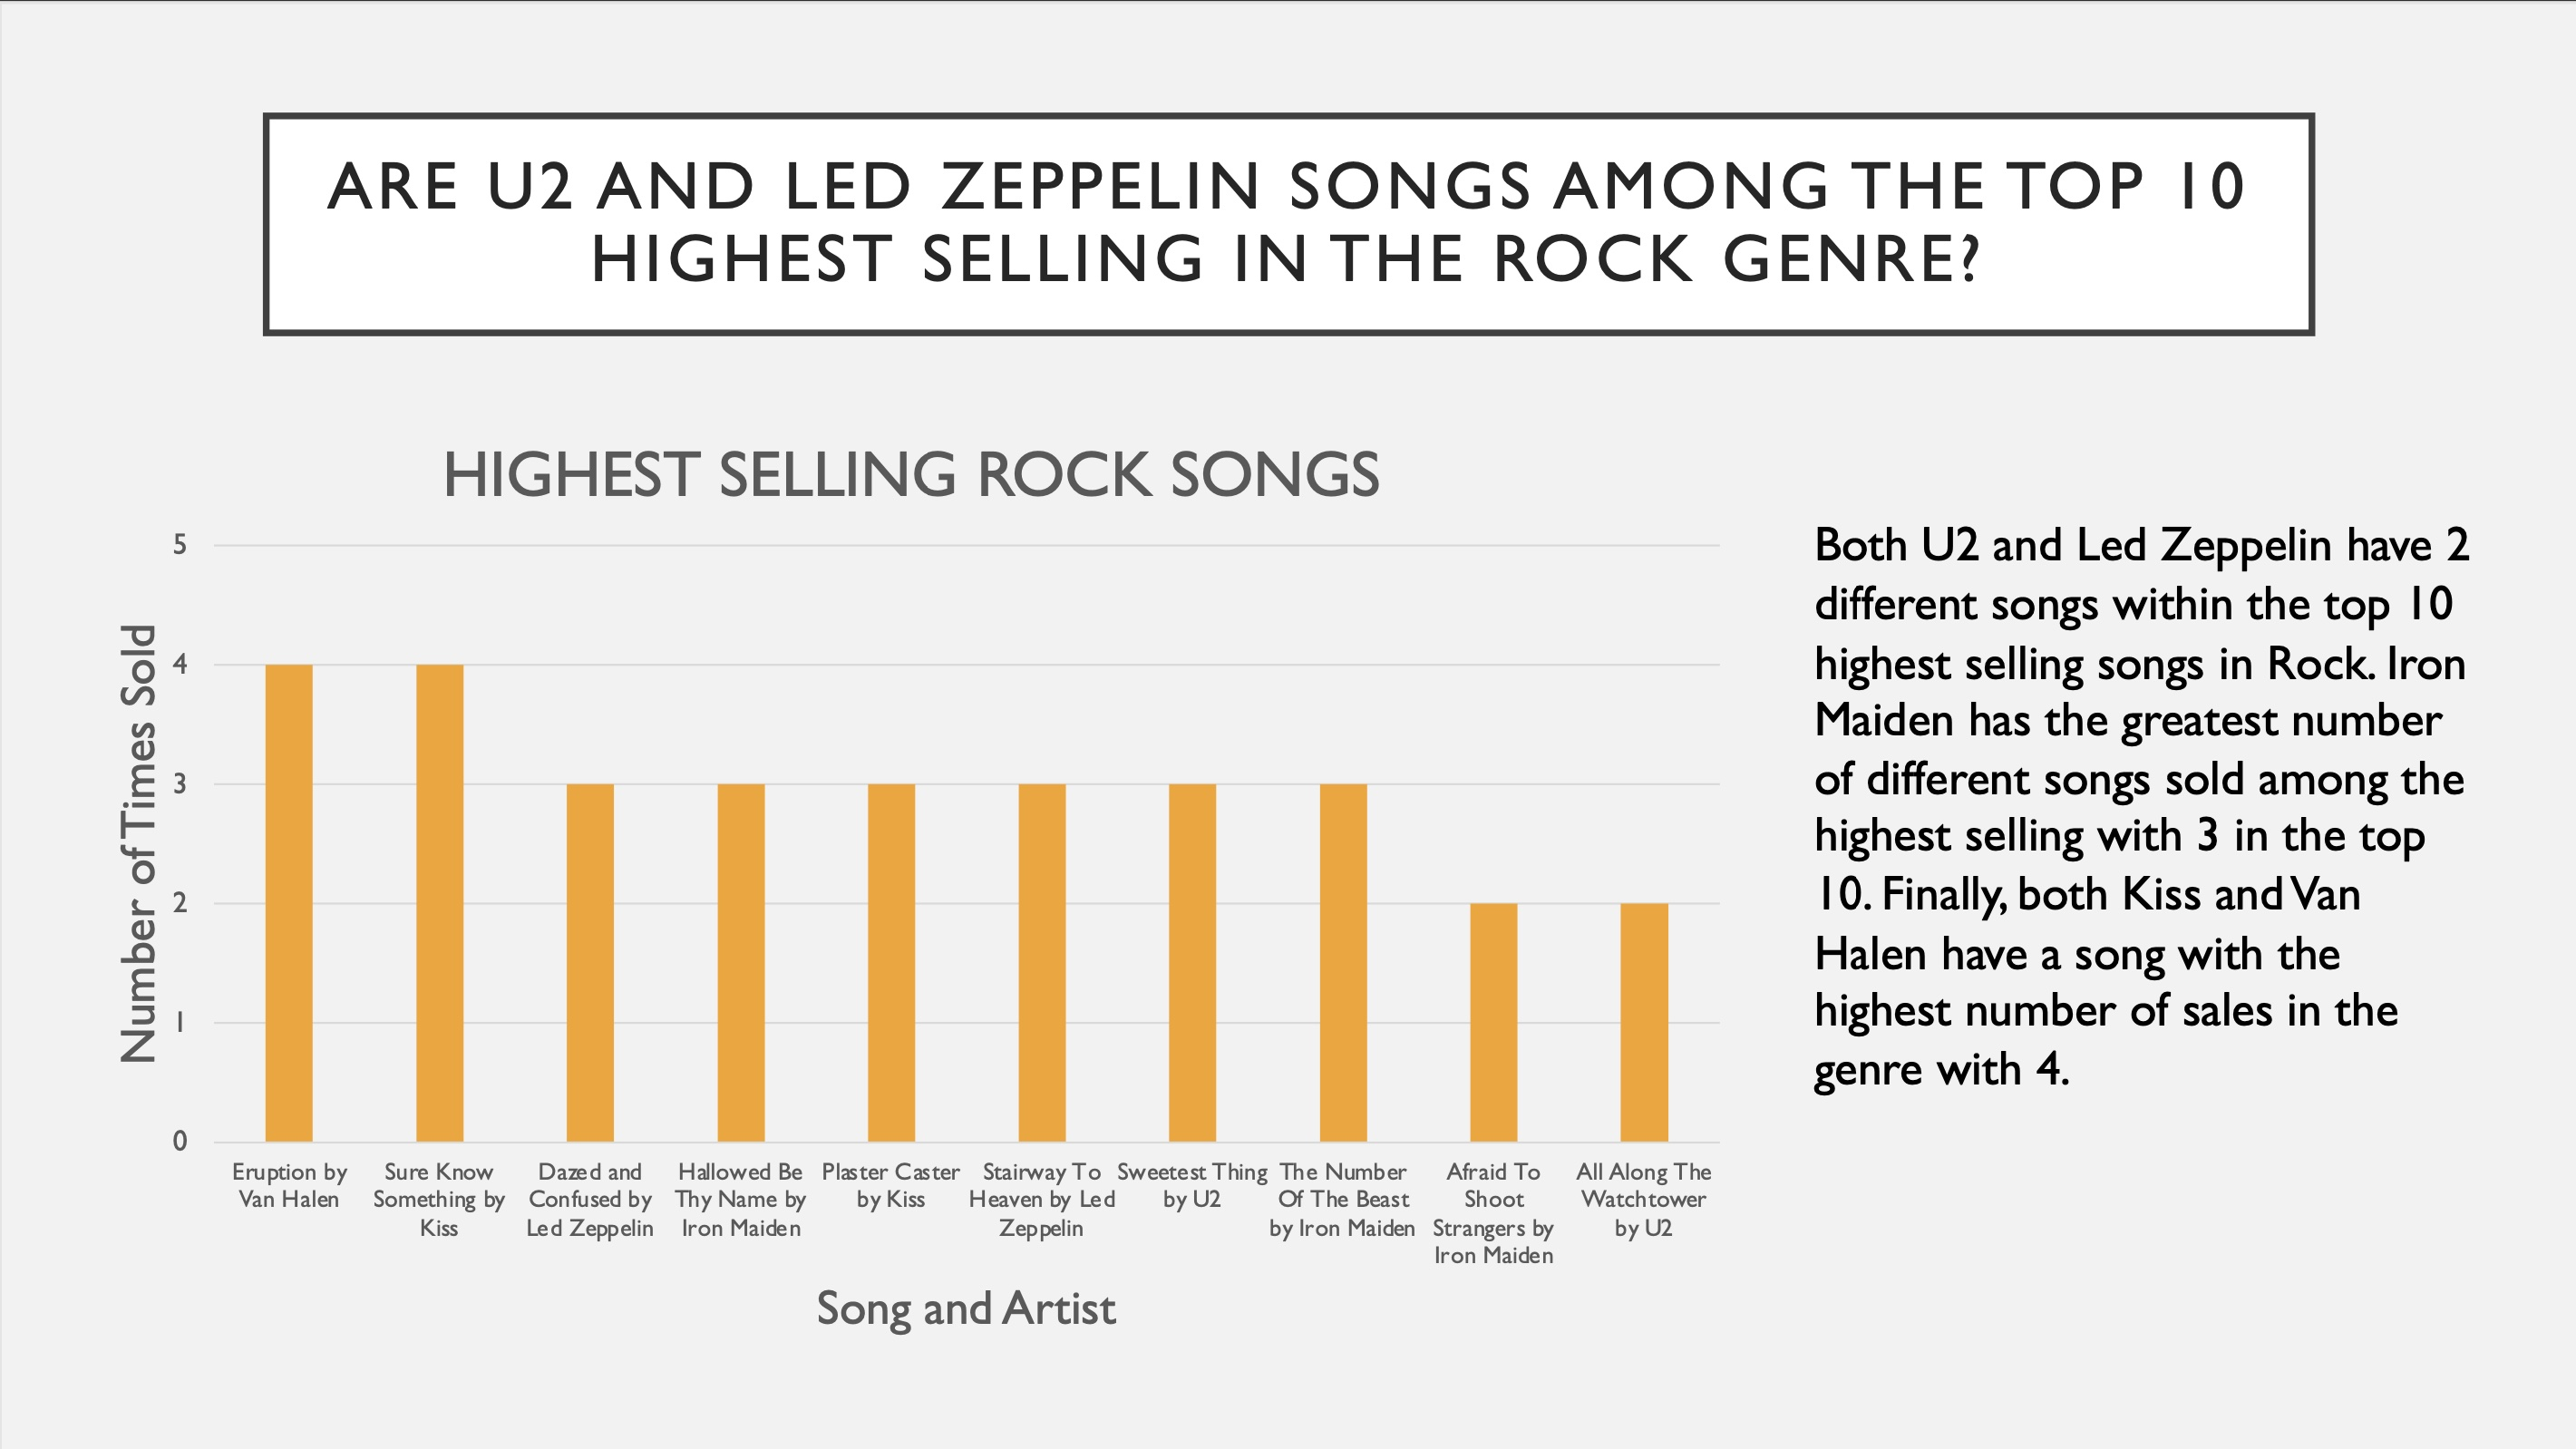

---
### Question \#4

#### Do the top 2 selling rock artists make up a large percentage of total sales within the genre?

In comparing the percentage of total sales to the top 2 selling Rock artists, we first need to create two tables in order to make the comparison for our presentation. We will compare the artists U2 and Led Zeppelin against the genre's total sales over the 5 years of data we have in the database.

SQLite uses different functions related to date functionality. The **DATE_TRUNC( )** equivalent is **STRFTIME( )**. Let's write the first CTE for our top selling artists grouped by year.

```sql
WITH tb1 AS
(SELECT STRFTIME('%Y',invoicedate) as year, SUM(invln.UnitPrice*invln.Quantity) as top_artist_total
	FROM invoice AS inv
	JOIN invoiceline AS invln
	ON inv.invoiceid = invln.invoiceid
	JOIN track AS t
	ON t.trackid = invln.trackid
	JOIN album AS alb
	ON alb.albumid = t.albumid
	JOIN artist AS a
	ON a.artistid = alb.artistid
	WHERE a.name IN ('U2', 'Led Zeppelin')
	GROUP BY 1
	ORDER BY 1
)
```

The second CTE will now filter by the entire Rock genre, grouped by the year once again.

```sql
tb2 AS (
SELECT STRFTIME('%Y',invoicedate) as year, SUM(invln.UnitPrice*invln.Quantity) as rock_artist_total
	FROM invoice AS inv
	JOIN invoiceline AS invln
	ON inv.invoiceid = invln.invoiceid
	JOIN track AS t
	ON t.trackid = invln.trackid
	JOIN genre AS g
	ON g.genreid = t.genreid
	JOIN album AS alb
	ON alb.albumid = t.albumid
	JOIN artist AS a
	ON a.artistid = alb.artistid
	WHERE g.name = 'Rock'
	GROUP BY 1
	ORDER BY 1
)
```

Now that we have our two tables, we can join the two tables on the year to produce our final query, selecting for the year first, followed by the sales dollar amounts for the top two artists vs the entire genre.

```sql
WITH tb1 AS
(SELECT STRFTIME('%Y',invoicedate) as year, SUM(invln.UnitPrice*invln.Quantity) as top_artist_total
	FROM invoice AS inv
	JOIN invoiceline AS invln
	ON inv.invoiceid = invln.invoiceid
	JOIN track AS t
	ON t.trackid = invln.trackid
	JOIN album AS alb
	ON alb.albumid = t.albumid
	JOIN artist AS a
	ON a.artistid = alb.artistid
	WHERE a.name IN ('U2', 'Led Zeppelin')
	GROUP BY 1
	ORDER BY 1
),
tb2 AS (
SELECT STRFTIME('%Y',invoicedate) as year, SUM(invln.UnitPrice*invln.Quantity) as rock_artist_total
	FROM invoice AS inv
	JOIN invoiceline AS invln
	ON inv.invoiceid = invln.invoiceid
	JOIN track AS t
	ON t.trackid = invln.trackid
	JOIN genre AS g
	ON g.genreid = t.genreid
	JOIN album AS alb
	ON alb.albumid = t.albumid
	JOIN artist AS a
	ON a.artistid = alb.artistid
	WHERE g.name = 'Rock'
	GROUP BY 1
	ORDER BY 1
)
SELECT tb1.year, tb1.top_artist_total, tb2.rock_artist_total
	FROM tb1
	JOIN tb2
    	ON tb1.year = tb2.year
```

| year | top_artist_total | rock_artist_total |
| :--- | :--- | :--- |
| 2009 | 22.7 | 178.2 |
| 2010 | 48.51 | 155.43 |
| 2011 | 29.7 | 156.42 |
| 2012 | 51.48 | 162.36 |
| 2013 | 39.6 | 174.24 |

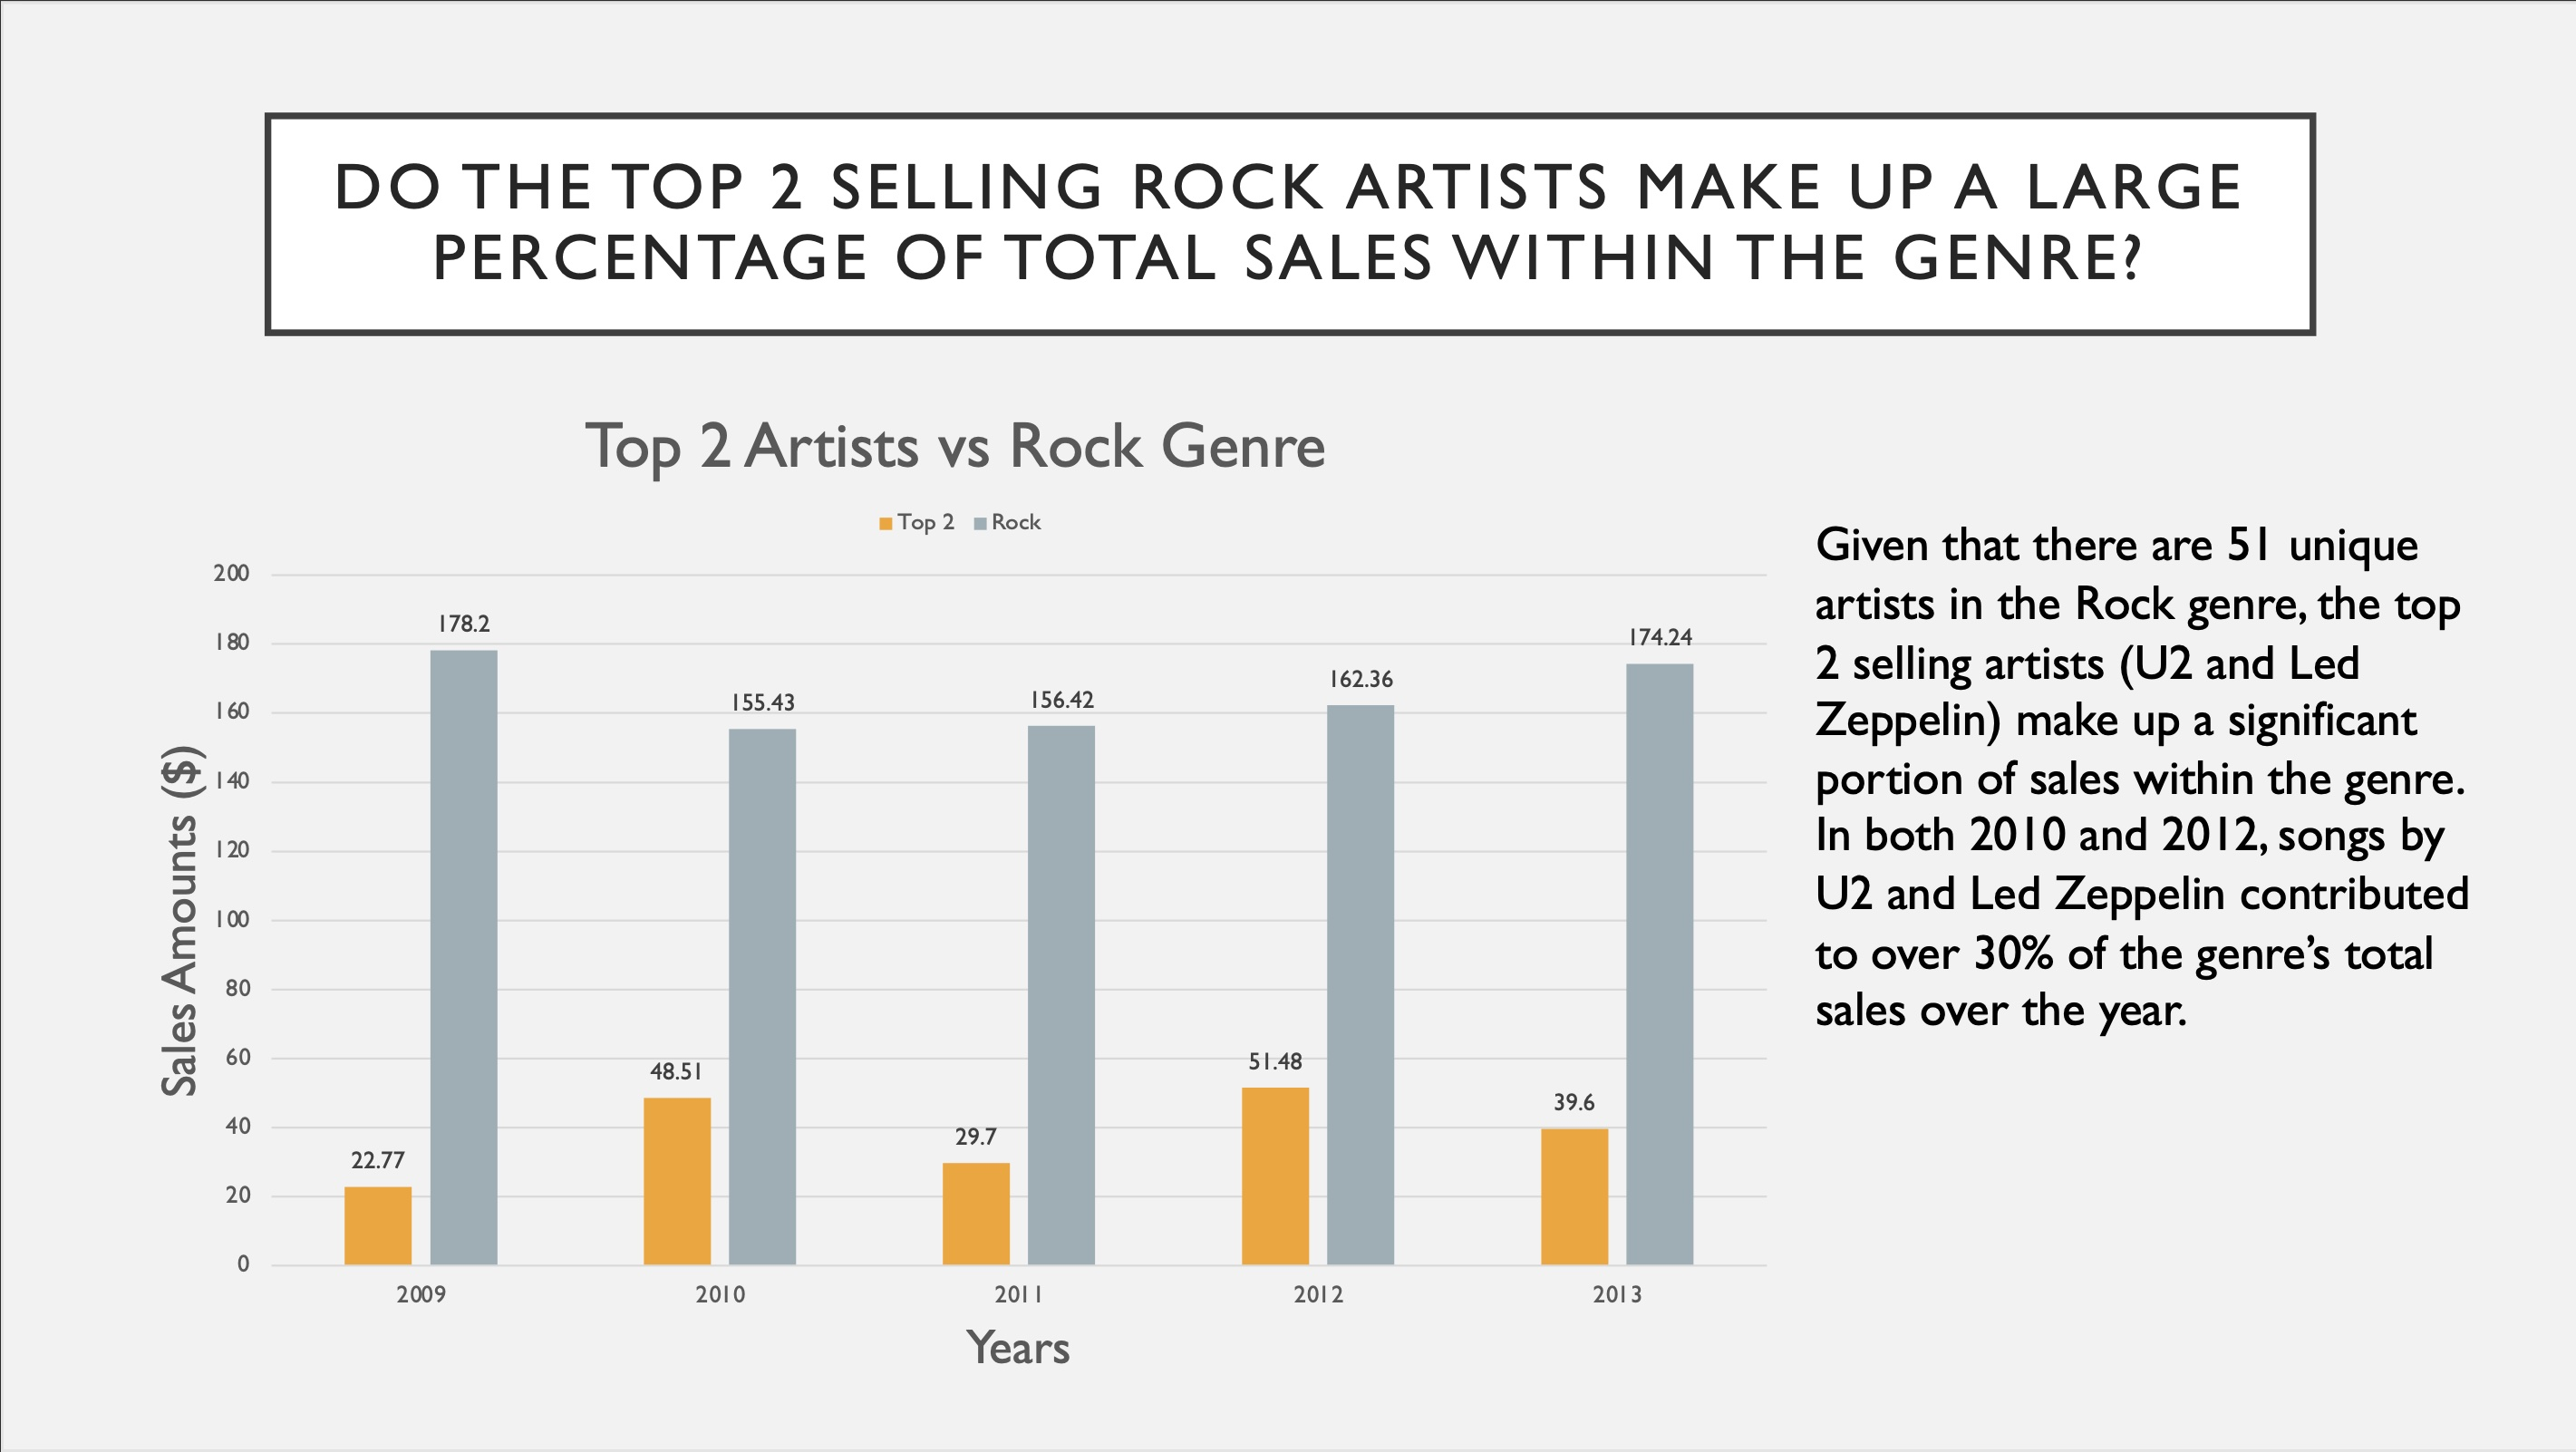

### Conclusions

After running our queries, I would recommend that the Chinook marketing team look into any U2 and Led Zeppelin songs that are aren't available for download within their digital music store and acquire them. Both artists are very popular and contribute disproportionally to sales within the most popular genre. Considering that U2 and Led Zeppelin make up only 4% (2/51) of the unique artists in the Rock genre, they have contributed to 23.5% of the genre's total sales over 5 years on average. Acquiring more songs from the artists' catalog could increase sales further if customers learn that new, different songs are available for purchase from these two popular artists.

### Next Steps

A further analysis could be undergone, determining if the other popular artists within the genre make up a high percentage of the genre's total sales. Targeting those popular artists could allow the Chinook marketing team to remove less popular songs and artists and insetad focus on obtaining songs from more popular artists going forward.

In addition, marketing campaigns can be hyper-targeted toward the genre's most popular artists, such as promotional weeks or months for specific artists, generating more interest and awareness.

Finally, surveys could be designed and distributed to customers in order to determine other new bands and songs that customers are currently listening to and would like to see available for purchase from the digital music store database.